# Working with complicated dataset

Your name: George Wilfert

### Question 1

blast_results: https://raw.githubusercontent.com/csbfx/advpy122-data/master/blast_results.csv

Read in the data from the csv file above. Skip all the comment lines, create a header for the dataframe based on the fields list in the comment line that starts with **# Fields:**. Drop the first column `query acc.ver`. Set the `subject acc.ver` as the index of the dataframe. The last column of the dataframe should be `publications`. Show the first five rows of the resulting dataframe.

In [ ]:
### Your code here . . .
import pandas as pd
columns = ['index','query acc.ver', 'subject acc.ver', '% identity', 'alignment length', 'mismatches', 'gap opens', 'q. start','q. end', 's. start', 's. end', 'evalue', 'bit score','% positives', 'bonds', 'publications']
data = pd.read_csv('https://raw.githubusercontent.com/csbfx/advpy122-data/master/blast_results.csv', comment='#', skiprows=6,names=columns,index_col=None)
data = data.drop(columns=['publications'])
data.columns = ['query acc.ver', 'subject acc.ver', '% identity', 'alignment length', 'mismatches', 'gap opens', 'q. start','q. end', 's. start', 's. end', 'evalue', 'bit score','% positives', 'bonds', 'publications']
data = data.set_index('subject acc.ver')
data = data.drop(columns=['query acc.ver'])
data.head()

,% identity,alignment length,mismatches,gap opens,q. start,q. end,s. start,s. end,evalue,bit score,% positives,bonds,publications
subject acc.ver,,,,,,,,,,,,,
NP_904328.1,100.000,318,0,0,1,318,1,318,0,629,100.00,"1,487",9
AGK29621.1,99.686,318,1,0,1,318,1,318,0,629,100.00,"17,947",47
YP_220563.1,99.686,318,1,0,1,318,1,318,0,627,100.00,"12,106",13
ACM24502.1,99.686,318,1,0,1,318,1,318,0,627,99.69,"2,319",41
AHG32084.1,99.371,318,2,0,1,318,1,318,0,627,100.00,"18,964",3


### Question 2
What is the average number of publications?

In [ ]:
### Your code here . . .
data['publications'] = pd.to_numeric(data['publications'], errors='coerce')
data['publications'].mean()


26.989690721649485

### Question 3
List the `subject acc.ver` that has over 15,000 bonds.

In [ ]:
### Your code here . . .
data['bonds'] = data['bonds'].str.replace(',', '').astype(int)
data =data[data['bonds'] > 15000]
data.index

Index(['AGK29621.1', 'AHG32084.1', '6G2J_H', 'YP_002791042.1', 'AGK29634.1',
       '0806162F', 'YP_009112408.1', 'YP_001876469.1', 'YP_009092269.1',
       'AHG32149.1', 'YP_009092074.1', 'YP_009450474.1', 'YP_004123270.1',
       'YP_009092073.1', 'AHZ60901.1', 'YP_004123350.1', 'YP_009453754.1',
       'ADD46492.1', 'YP_007025968.1', 'YP_009453806.1', 'YP_007024956.1',
       'ASM92364.1', 'YP_006073044.1', 'ASM92494.1', 'ADG95699.1',
       'YP_004891275.1', 'YP_009166014.1', 'YP_009538416.1', 'YP_009414182.1',
       'YP_009178854.1', 'YP_009414415.1', 'YP_009353908.1', 'YP_009093743.1',
       'ABX45285.1', 'YP_009414156.1', 'YP_009414363.1'],
      dtype='object', name='subject acc.ver')

### Question 4
Create a plot that shows the correlation between `% identity` and `% positives`.

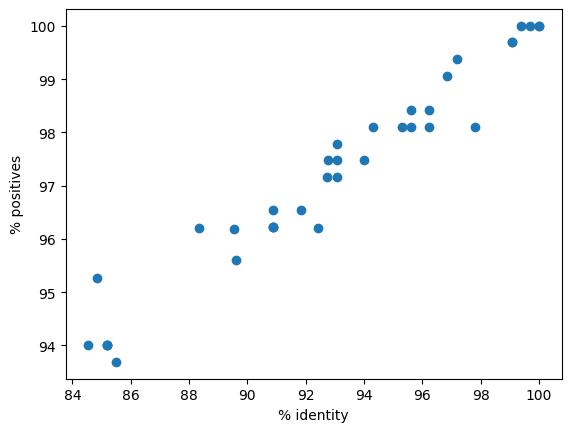

In [ ]:
### Your code here . . .
import matplotlib.pyplot as plt
plt.scatter(data['% identity'], data['% positives'])
plt.xlabel('% identity')
plt.ylabel('% positives')
plt.show()

### Question  5
Add a column `Protein source` to the dataframe from Question 1 based on the data in this csv file: https://raw.githubusercontent.com/csbfx/advpy122-data/master/protein_source.csv. Merge the data when the `subject acc.ver` from the dataframe equals to `Protein` in the csv file. Entries without a matching protein will have `NA` as `Protein source`.

In [ ]:
### Your code here . . .
protein = pd.read_csv('https://raw.githubusercontent.com/csbfx/advpy122-data/master/protein_source.csv')
protein.columns = ['index','subject acc.ver', 'Protein source']
protein = protein.drop(columns=['index'])
protein.head()

data = pd.merge(data, protein, left_index=True, right_on='subject acc.ver', how='left')
data.set_index('subject acc.ver', inplace=True)
data['Protein source'] = data['Protein source'].fillna('NA')
data.head()

,% identity,alignment length,mismatches,gap opens,q. start,q. end,s. start,s. end,evalue,bit score,% positives,bonds,publications,Protein source
subject acc.ver,,,,,,,,,,,,,,
AGK29621.1,99.686,318,1,0,1,318,1,318,0,629,100.00,17947,47.0,NA
AHG32084.1,99.371,318,2,0,1,318,1,318,0,627,100.00,18964,3.0,NA
6G2J_H,100.000,317,0,0,2,318,2,318,0,626,100.00,15663,29.0,NA
YP_002791042.1,99.057,318,3,0,1,318,1,318,0,625,99.69,15830,37.0,GenPept
AGK29634.1,99.057,318,3,0,1,318,1,318,0,623,99.69,17381,14.0,NA
